In [1]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells
import os
import re
from scipy.signal import find_peaks

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })

plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12

ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

#  Fourier Analysis of Coupled Electric Oscillations

Group #13

NG Kuok Fung | #3797903 

Edgar Harutyunyan | #3775171

**Overview of Tasks**

***Task 1***

Measure the time traces and frequency spectra of the free beat oscillations of the low-point circuit for ten different coupling capacitance values. Plot the ten frequency spectra into one graph. Determine the frequencies of the in-phase and out-of-phase oscillation modes. Calculate the coupling factors from the measured frequencies. Fit the theoretical expressions to the data to determine the value of the capacitance $C$.

***Task 2***

Measure the time traces and frequency spectra of the free beat oscillations of the high-point circuit for ten different coupling capacitance values. Plot the ten frequency spectra into one graph. Determine the frequencies of the in-phase and out-of-phase oscillation modes. Calculate the coupling factors from the measured frequencies. Fit the theoretical expressions to the data to determine the value of the capacitance $C$.

***Task 3***

Measure the beat period of the high-point circuit for one selected coupling factor. Compare the values to those obtained from the frequencies of the in-phase and out-of-phase oscillation modes. Make plots of both the time trace and the spectrum.

***Task 4***

Measure the coupling factor for two inductively coupled resonant circuits as a function of the distance between the inductance coils. Plot the frequency spectra in one graph. Plot the coupling factor as a function of distance and analyze the distance dependence.

In [2]:
# GLOBALS
data_dir='./data/'
#L = 

## Task 2

***Task Definition*** 

Measure the time traces and frequency spectra of the free beat oscillations of the high-point circuit for ten different coupling capacitance values. Plot the ten frequency spectra into one graph. Determine the frequencies of the in-phase and out-of-phase oscillation modes. Calculate the coupling factors from the measured frequencies. Fit the theoretical expressions
to the data to determine the value of the capacitance $C$.


***Theoretical Basis*** 

The angular frequecies for in-phase and out-of-phase oscillation modes have been derived in the lab instruction $^{[1]}$ (Eq.24, 25):

$$\omega_+ = \frac{1}{\sqrt{L(C + 2C_K)}} \label{eq2.1} \tag{2.1}$$

$$\omega_- = \frac{1}{\sqrt{LC}} \label{eq2.2} \tag{2.2}$$

- $\omega_+$: In-phase angular frequency  
- $\omega_-$: Out-of-phase angular frequency

From Eq.[2.1](#mjx-eqn-eq2.1) and Eq.[2.2](#mjx-eqn-eq2.2) one obtains the coupling factor of high-point circuit:

$$k_{C,H} = \frac{\omega_-^2 -\omega_+^2}{\omega_-^2 + \omega_+^2} = \frac{C_K}{C + C_K} \label{eq2.3} \tag{2.3}$$

***Procedure***

1. The frequency spectra measurements have been extracted from the picoscope software.

2. For each $C_K$ load capacitance value the in- and out-of-phase angular frequecies have been determined using ``find_peaks`` method from `scipy.signal` python module library.

3. The $C$ capacitance has been determined using curve fitting for [Eq 2.3](#mjx-eqn-eq2.3).

In [3]:
# Data Preprocessing
task_dir = data_dir + 'Task2/csv/'
C_k_l = [] # capacitance in Farads
C_k_str_l = []
df_l = []

for path in os.listdir(task_dir):
    s = re.findall('.*pF', path)[0]
    C_k_str_l.append(s)
    r = float(''.join(s[:-2]))
    C_k_l.append(r) # pF
    df = pd.read_csv(task_dir + path, delimiter=';', skiprows=1, dtype=np.float64, decimal=',')
    df.columns = ['Frequency', 'Voltage'] 
    df_l.append(df)

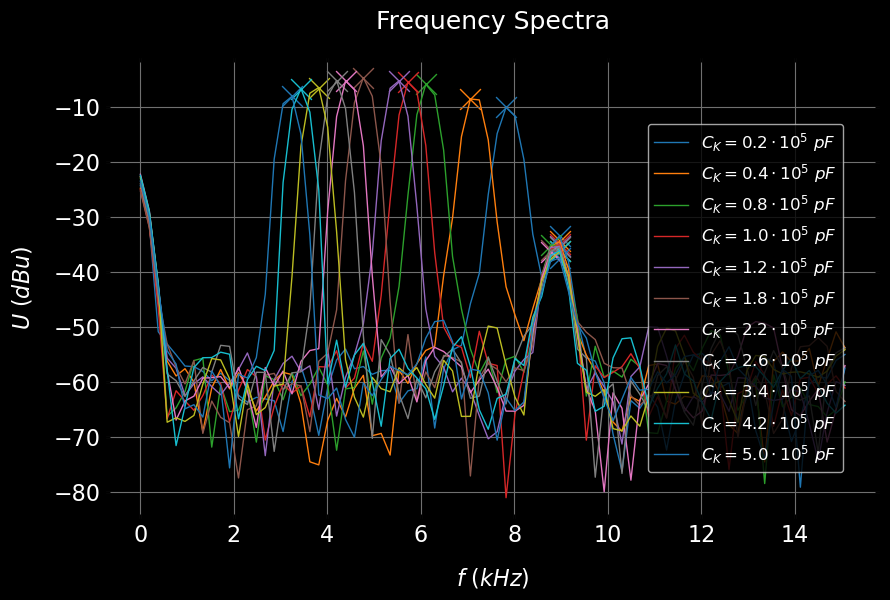

<IPython.core.display.Latex object>

In [4]:
f_in_l = [] # in kHz
f_out_l = [] # in kHz
w_in_l = [] # in rad * Hz
w_out_l = [] # in rad * Hz
for i in range(len(C_k_l)):
    
    label_s = r'$C_K = %s \cdot 10^{%s} ~pF$' % (C_k_str_l[i][:-4], C_k_str_l[i][-3])
    
    x = np.array(df_l[i]['Frequency'])
    y = np.array(df_l[i]['Voltage'])
    
    peaks, _ = find_peaks(y[:80], height=-40)
    f_in_l.append(x[peaks][0])
    f_out_l.append(x[peaks][1])
    w_in_l.append(x[peaks][0]*1e3*2*np.pi)
    w_out_l.append(x[peaks][1]*1e3*2*np.pi)
    
    plt.scatter(x[peaks], y[peaks], marker='x')
    plt.plot(x[:80], y[:80], label=label_s)
    
plt.title(r'Frequency Spectra')
plt.xlabel(r'$f$ ($kHz$)')
plt.ylabel(r'$U$ ($dBu$)')
plt.legend(loc=(0.7,0.1))
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 2.1$: Frequency spectra plot of ten measurements of high-point circuit.'))

In [5]:
def k_fit(c_k_arg, c_arg):
    return c_k_arg/(c_k_arg + c_arg)

In [14]:
w_in_arr = np.array(w_in_l)
w_out_arr = np.array(w_out_l)
k_l_arr = (w_out_arr**2 - w_in_arr**2)/(w_out_arr**2 + w_in_arr**2)
fit = curve_fit(k_fit, np.array(C_k_l), k_l_arr)
C = fit[0][0]
u_C = np.sqrt(fit[1][0][0])
dy(Lx(r'$$C = (%.2f \pm %.3f) ~\mu F$$' % (C*1e-6, u_C*1e-6))) # in microF

<IPython.core.display.Latex object>

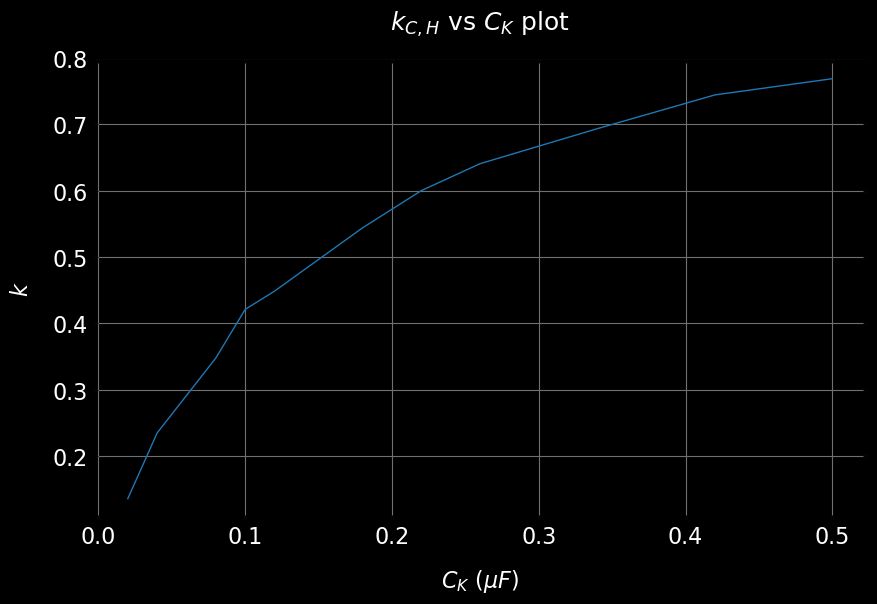

<IPython.core.display.Latex object>

In [22]:
#plt.scatter(x[peaks], y[peaks], marker='x')
plt.plot(np.array(C_k_l)*1e-6, k_l_arr)
    
plt.title(r'$k_{C,H}$ vs $C_K$ plot')
plt.xlabel(r'$C_K$ ($\mu F$)')
plt.ylabel(r'$k$')
#plt.legend(loc=(0.7,0.1))
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 2.2$: Coupling factor as a funtion with coupling capacitance.'))

## Task3

***Task Definition*** 

Measure the beat period of the high-point circuit for one selected coupling factor. Compare the values to those obtained from the frequencies of the in-phase and out-of-phase oscillation modes. Make plots of both the time trace and the spectrum.

***Theoretical Basis*** 

Angular frequency of the beat is: 

$$\omega_S = \omega_- - \omega_+ = \frac{2\pi}{T_S}$$

- $T_S$ : Beat period

***Procedure***

1. The measurements in beat mode has been done for the coupling capacitance $C_K = 28 \cdot 10^3 pF$.

2. Angular frequecies have been determined using ``find_peaks``.

3. The coupling factor and $C$ capacitance value has been evaluated using [Eq 2.3](#mjx-eqn-eq2.3).

4. From the direct measurements of angular frequencies the oscillation and beat periods have been computed.

In [7]:
# Data Preprocessing
task_dir = data_dir + 'Task3/'
task_3_f = task_dir + '28E3pF_f.csv'
task_3_t = task_dir + '28E3pF_t.csv'
C_k = 28*1e3 # pF

df_f = pd.read_csv(task_3_f, delimiter=';', skiprows=1, dtype=np.float64, decimal=',')
df_t = pd.read_csv(task_3_t, delimiter=';', skiprows=1, dtype=np.float64, decimal=',')   
df_f.columns = ['Frequency', 'Voltage']
df_t.columns = ['Time', 'Voltage']

cut_ind_t = int(len(df_t) * 0.6)  
cut_ind_f = int(len(df_f) * 0.025)

x_t = np.array(df_t['Time'][:cut_ind_t]) # ms
x_f = np.array(df_f['Frequency'][:cut_ind_f]) # kHz

y_t = np.array(df_t['Voltage'][:cut_ind_t]) # V
y_f = np.array(df_f['Voltage'][:cut_ind_f]) # dBu

peaks, _ = find_peaks(y_f, height=-35)
w_in = x_f[peaks[0]] * 1e3 * 2 * np.pi # rad / s
w_out = x_f[peaks[1]] * 1e3 * 2 * np.pi # rad / s

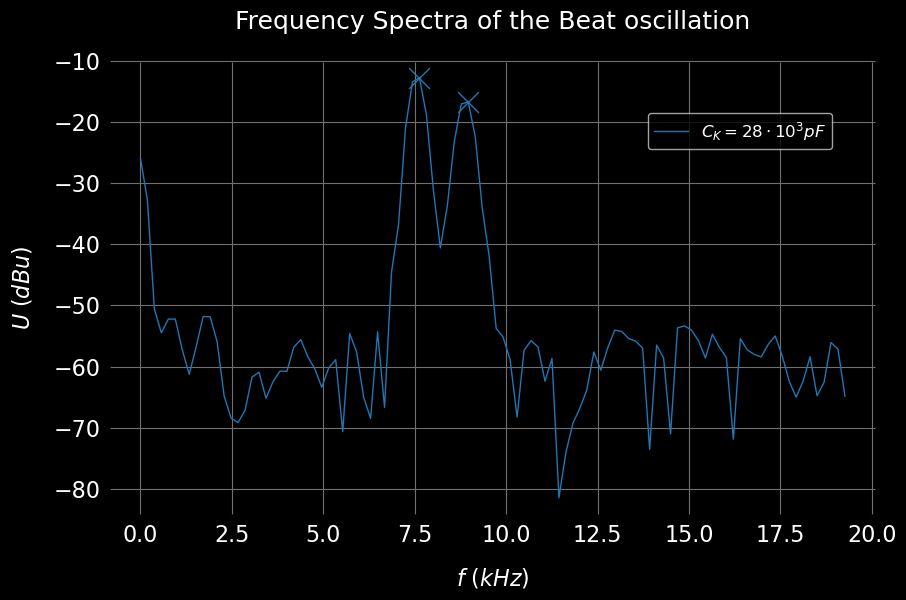

<IPython.core.display.Latex object>

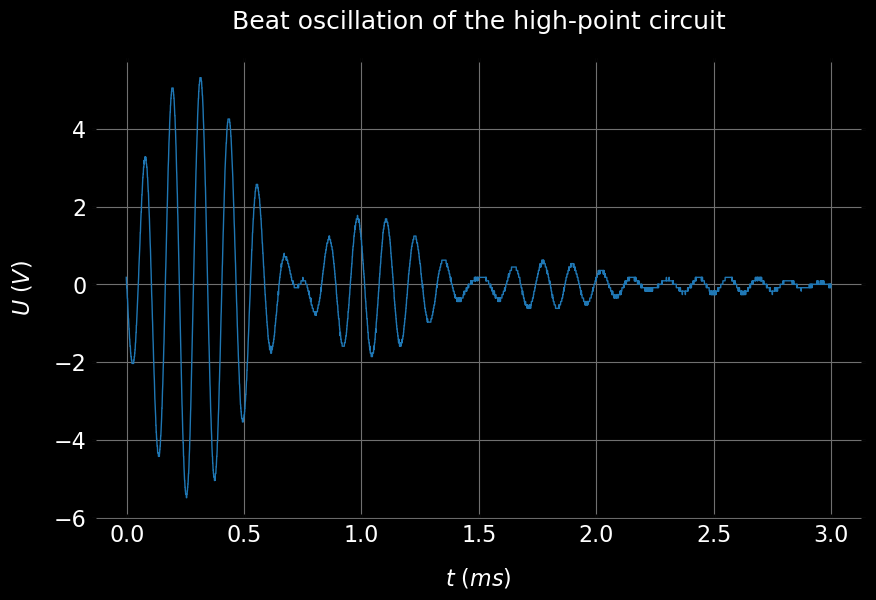

<IPython.core.display.Latex object>

In [8]:
plt.title(r'Frequency Spectra of the Beat oscillation')
plt.xlabel(r'$f$ ($kHz$)')
plt.ylabel(r'$U$ ($dBu$)')
plt.plot(x_f, y_f, label=r'$C_K = 28 \cdot 10^3 pF$')
plt.scatter(x_f[peaks],y_f[peaks], marker='x')
plt.legend(loc=(0.7,0.8))
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 3.1$: Frequency spectra plot of the beat oscillation of the high-point circuit.'))

plt.title(r'Beat oscillation of the high-point circuit')
plt.xlabel(r'$t$ ($ms$)')
plt.ylabel(r'$U$ ($V$)')
#plt.legend(loc=(0.7,0.1))
plt.plot(x_t, y_t, label=r'$C_K = 28 \cdot 10^3 pF$')
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 3.2$: Beat oscillation of the high-point circuit for $C_K = 28 \cdot 10^3 pF$.'))

***Analysis***

In [26]:
k = (w_out**2 - w_in**2) / (w_out**2 + w_in**2)
dy(Lx(r'Angular frequency of out-of-phase mode is $w_- = %.2f ~rad\cdot ms^-$' % (w_out*1e-3)))
dy(Lx(r'Angular frequency of in-phase mode is $w_+ = %.2f ~rad\cdot ms^-$' % (w_in*1e-3)))
T_S = 2*np.pi/(w_out - w_in) # s
T = 2*np.pi/w_out # s
dy(Lx(r'The beat period: $$T_S = \frac{2\pi}{\omega_- -\omega_+} = %.2f ms$$' % (T_S*1e3)))
dy(Lx(r'Whereas, the oscillation period: $$T = \frac{2\pi}{\omega_-} = %.2f ms$$' % (T*1e3)))
dy(Lx(r'Hence, in a beat there are $\frac{T_S}{T} \approx %d$ oscillations.' % (T_S//T)))
dy(Lx(r'The coupling factor: $$k_{C,H} = \frac{\omega_-^2 -\omega_+^2}{\omega_-^2 + \omega_+^2} = %.4f $$' % k))
C = C_k * (1/k - 1)
dy(Lx(r'The capacitance: $$C = C_k \left(\frac{1}{k_{C,H}} - 1\right) = %.2f ~\mu F$$' % (C*1e-6)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Notice, that the obtained result for the capacitance value is in agreement with the fitted result obtained in Task2.

## References

1) [E17e Lab instruction](https://moodle2.uni-leipzig.de/pluginfile.php/3621566/mod_resource/content/1/E17e_2024.pdf)